In [354]:
#from google.colab import files
#files.upload()

### 1. Import the necessary libraries

In [355]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
sns.set(color_codes=True)

import warnings
warnings.simplefilter(action='ignore')

from scipy.stats import norm
import scipy.stats as stats
from math import *

pd.set_option('display.max_columns',None )
pd.set_option('display.width', 1000)

import copy
from sklearn.preprocessing import LabelEncoder

### 2. Read the data as a data frame

In [356]:
#Importing data from csv to data frame
df=pd.read_csv('insurance (2).csv')

### 3a. Shape of data

In [357]:

print("Shape of data:",df.shape)
print("Available dataframe shape:\nTotal Columns:",df.shape[1],"\nTotal Rows:",df.shape[0])

Shape of data: (1338, 7)
Available dataframe shape:
Total Columns: 7 
Total Rows: 1338


In [358]:
#3M - Mean Median Mode

In [359]:
 def get3M( data):
        print("Mean:",np.mean(data))
        print("Meadian:",np.median(data))
        print("Mode:",stats.mode(data)[0])
        print("Mode:",data.mode())
        
get3M(df.age)
print('''Mean and meadian are close to equal but mode is way below mean/median, 
showing highest peak is towards lower range of data set.
 mean>median - slightly Positive or rt skewed''')

Mean: 39.20702541106129
Meadian: 39.0
Mode: [18]
Mode: 0    18
dtype: int64
Mean and meadian are close to equal but mode is way below mean/median, 
showing highest peak is towards lower range of data set.
mean>median - slightly Positive or rt skewed


In [360]:
       
get3M(df.bmi)
print('''Mean and meadian are close to equal but mode is slightly more than mean/median, 
showing highest peak is close to middle range of data set.
 mean>median - slightly Positive or rt skewed''')

Mean: 30.663396860986538
Meadian: 30.4
Mode: [32.3]
Mode: 0    32.3
dtype: float64
Mean and meadian are close to equal but mode is slightly more than mean/median, 
showing highest peak is close to middle range of data set.
 mean>median - slightly Positive or rt skewed


In [361]:
get3M(df.charges)
print('''Mean and meadian are close to equal but mode is very less than mean/median, 
showing highest peak is towards low range of data set.
 mean>median - highly Positive or rt skewed''')

Mean: 13270.422265141257
Meadian: 9382.033
Mode: [1639.5631]
Mode: 0    1639.5631
dtype: float64
Mean and meadian are close to equal but mode is very less than mean/median, 
showing highest peak is towards low range of data set.
 mean>median - highly Positive or rt skewed


In [362]:
print("Mean:\n",df.mean())
print("\nMedian:\n",df.median())
print("\nMod:\n",df.mode())


Mean:
 age            39.207025
bmi            30.663397
children        1.094918
charges     13270.422265
dtype: float64

Median:
 age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64

Mod:
    age   sex   bmi  children smoker     region    charges
0   18  male  32.3         0     no  southeast  1639.5631


### 3b. Data Type of each Attribute

In [363]:
print("Attribute Details:")
print(df.info())
print('''\nColumns are having expected data types.
All are having non null values and of same count.

BMI and Charges are Float having continuous data,
Age and Children are int as discrete numerical values, No. of Children is a numerical value but considered as categorical
Sex, Smooker and Region are object(contains string) categorical data
''')

Attribute Details:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Columns are having expected data types.
All are having non null values and of same count.

BMI and Charges are Float having continuous data,
Age and Children are int as discrete numerical values, No. of Children is a numerical value but considered as categorical
Sex, Smooker and Region are object(contains string) categorical data



### Analyzing Data present

In [364]:
print("Top 10 rows:\n",df.head(10))
print("\nBottom 10 rows:\n",df.tail(10))
print("\nSample Values looks widely distributed across all columns")

Top 10 rows:
    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692

Bottom 10 rows:
       age     sex     bmi  children smoker     region      charges
1328   23  female  24.225         2     no  northeast  22395.74424
1329   52    male  38.600         2     no  southwest  10325.20600
1330   57  female  25.740         2     no  southeast  12629.16

### 3c. Checking presence of missing values

In [365]:
print(df.isna().sum())
print()
print(df.isnull().sum())
print("\nNo nan/null data present, validated same using unique value and value counts as well")

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No nan/null data present, validated same using unique value and value counts as well


In [366]:
print(df.sex.unique())
df.sex.value_counts()

['female' 'male']


male      676
female    662
Name: sex, dtype: int64

In [367]:
print(df.children.unique())
df.children.value_counts()

[0 1 3 2 5 4]


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [368]:
print(df.smoker.unique())
df.smoker.value_counts()

['yes' 'no']


no     1064
yes     274
Name: smoker, dtype: int64

In [369]:
print(df.region.unique())
df.region.value_counts()

['southwest' 'southeast' 'northwest' 'northeast']


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [370]:
print(df.bmi.unique())
df.bmi.value_counts()

[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.06  27.17  23.37  37.1
 23.75  28.975 31.35  33.915 28.785 28.3   37.4   17.765 34.7   26.505
 22.04  35.9   25.555 28.05  25.175 31.9   36.    32.49  25.3   29.735
 38.83  30.495 37.73  37.43  24.13  37.145 39.52  24.42  27.83  36.85
 39.6   29.8   29.64 

32.300    13
28.310     9
31.350     8
30.800     8
30.875     8
          ..
20.100     1
29.545     1
37.900     1
25.520     1
24.090     1
Name: bmi, Length: 548, dtype: int64

In [371]:
print(df.charges.unique())
df.charges.value_counts()

[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


1639.56310     2
8825.08600     1
43254.41795    1
5257.50795     1
1980.07000     1
              ..
12269.68865    1
6360.99360     1
7371.77200     1
16420.49455    1
34254.05335    1
Name: charges, Length: 1337, dtype: int64

In [372]:
df.age.unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

### 3d. 5 point summary of numerical attributes

In [373]:
print(df.describe(include='all'))
print("\n\n")
print(df.describe(include='all',percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9,.95]))
print('''
Categorical Values Sex, Smoker, Region seems to have expected variation of unique data.
For numerical continuous Variable
Age: 
- min and max age are from range of 18-64
- Q1 - 27
- Q2 - 39
- Q3 - 51
- mean and 50 percentile are very close giving a idea that majority of insurance hoalders are close to mean age of 39.
- mean and median are similar 39.2 -- 39 - suggests distribution is not too skewed
- std deviation is quite high showing high variation

BMI:
- min and max bmi are 15.96 -- 53.13
- Q1 - 26
- Q2 - 30
- Q3 - 34
- mean and 50% are very close around 30
- mean and median are similar 30.6 -- 30.4 - suggests distribution is not skewed
- considering 20%-80% from level 25.32--35.86, seems a lesser gap for 60% of the data consideiring std deviation of 6.09 which leads to possibiliteis of high outliers
- Std deviation is low

Charges:
- min and max charges are  1121.87 -- 63770.42
- Q1 - 4740.287150
- Q2 - 9382.033000
- Q3 - 16639.912515
- mean and 50% are 113270.42 -- 9382.03
- mean is higher then meadian suggests distribution that is skewed to the right
- 90%, 95% and max values are having a huge gap suggesting outliers presence towards higher charges
- Std deviation is high
''')

                age   sex          bmi     children smoker     region       charges
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   1338.000000
unique          NaN     2          NaN          NaN      2          4           NaN
top             NaN  male          NaN          NaN     no  southeast           NaN
freq            NaN   676          NaN          NaN   1064        364           NaN
mean      39.207025   NaN    30.663397     1.094918    NaN        NaN  13270.422265
std       14.049960   NaN     6.098187     1.205493    NaN        NaN  12110.011237
min       18.000000   NaN    15.960000     0.000000    NaN        NaN   1121.873900
25%       27.000000   NaN    26.296250     0.000000    NaN        NaN   4740.287150
50%       39.000000   NaN    30.400000     1.000000    NaN        NaN   9382.033000
75%       51.000000   NaN    34.693750     2.000000    NaN        NaN  16639.912515
max       64.000000   NaN    53.130000     5.000000    NaN        NaN  63770

### 3e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

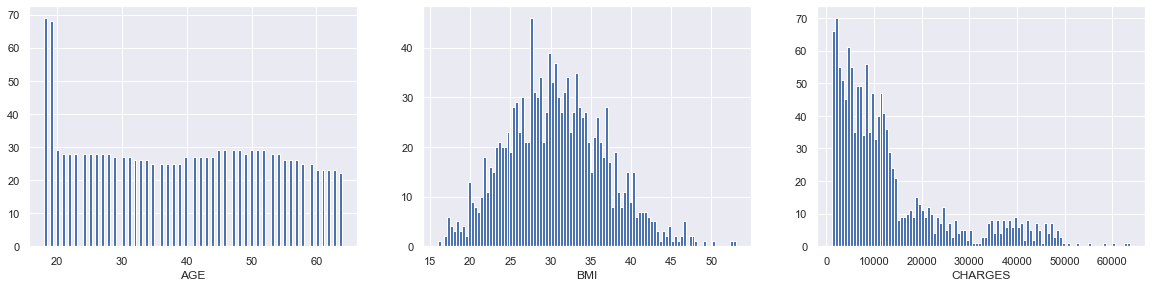

In [374]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df.age,bins=100)
plt.xlabel("AGE")

plt.subplot(3,3,2)
plt.hist(df.bmi,bins=100)
plt.xlabel("BMI")

plt.subplot(3,3,3)
plt.hist(df.charges,bins=100)
plt.xlabel("CHARGES")

plt.show();

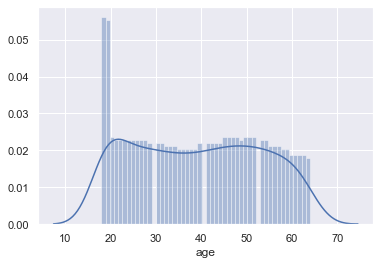


Distribution shows there is high frequence for age 18-19
For rest of the age groups the distribution is kind of flat line i.e. more or less distributed evenly



In [375]:
sns.distplot(df.age,bins=50);
plt.show()
print('''
Distribution shows there is high frequence for age 18-19
For rest of the age groups the distribution is kind of flat line i.e. more or less distributed evenly
''')

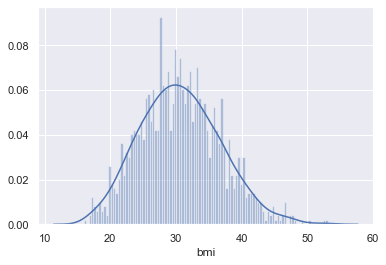


Distribution seems a little skewed towards right, few outliers towards rt side of the distribution
major peaks or frequencies are between 25-35



In [376]:
sns.distplot(df.bmi,bins=100);
plt.show()
print('''
Distribution seems a little skewed towards right, few outliers towards rt side of the distribution
major peaks or frequencies are between 25-35
''')

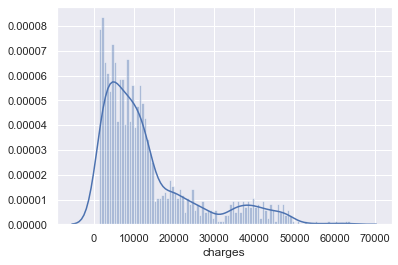


Distribution is highly skewed towards right
Highest peaks or frequencies are under 10K
Major Outliers towards higher charges



In [377]:
sns.distplot(df.charges,bins=100);
plt.show()
print('''
Distribution is highly skewed towards right
Highest peaks or frequencies are under 10K
Major Outliers towards higher charges
''')

### 3f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [378]:
df.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

In [379]:
# Measure of skewness
print("Age \nSkweness : ", stats.skew(df.loc[:,'age']))
print("Kurtosis : ", stats.kurtosis(df.loc[:,'age']))
print("\nBMI\nSkweness : ", stats.skew(df.loc[:,'bmi']))
print("Kurtosis : ", stats.kurtosis(df.loc[:,'bmi']))
print("\nCharges\nSkweness : ", stats.skew(df.loc[:,'charges']))
print("Kurtosis : ", stats.kurtosis(df.loc[:,'charges']))


Age 
Skweness :  0.055610083072599126
Kurtosis :  -1.2449206804584227

BMI
Skweness :  0.28372857291709386
Kurtosis :  -0.05502310583700032

Charges
Skweness :  1.5141797118745743
Kurtosis :  1.595821363956751


In [380]:

print('''
Age, low +ve skewness is less but -ve kurtosis is high in the distribution representing a flat plateu or distribution of data
Negative values of kurtosis indicate that a distribution is flat and has thin tails

BMI, low +ve  skewness and low negetive kurtosis. Very close to normal distribution

Charges, high positive skewness, long tail towards right, more outliers towards right.
high positive values of kurtosis indicate that a distribution is peaked and possess thick tails
''')


Age, low +ve skewness is less but -ve kurtosis is high in the distribution representing a flat plateu or distribution of data
Negative values of kurtosis indicate that a distribution is flat and has thin tails

BMI, low +ve  skewness and low negetive kurtosis. Very close to normal distribution

Charges, high positive skewness, long tail towards right, more outliers towards right.
high positive values of kurtosis indicate that a distribution is peaked and possess thick tails



### g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

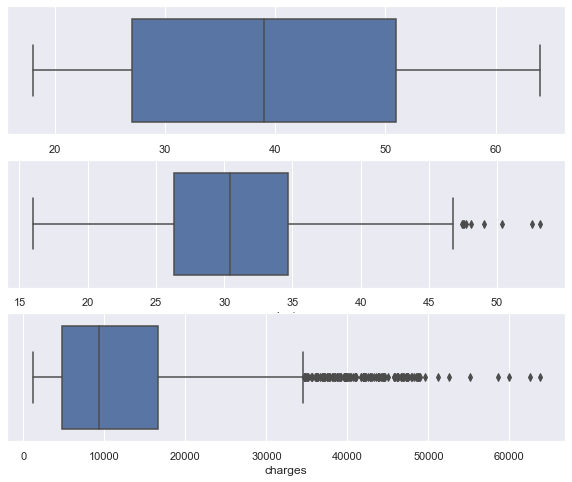

In [381]:
plt.figure(figsize= (10,8))
plt.subplot(3,1,1)
sns.boxplot(x=df.age)
plt.subplot(3,1,2)
sns.boxplot(x=df.bmi)
plt.subplot(3,1,3)
sns.boxplot(x=df.charges)

plt.show()


Box plots shows 
- Age - No outliers
- BMI - Few outliers for higher bmi values
- Charges - High outliers count towards high charges range


In [382]:
#getting 2 sigma values
print("Age:\n",df[(df.age>df.age.mean()+2*df.age.std())|(df.age<df.age.mean()-2*df.age.std())])
print("\nBMI:\n")
#df[(df.bmi>df.bmi.mean()+2*df.bmi.std())|(df.bmi<df.bmi.mean()-2*df.bmi.std())]
print(df[(df.bmi>df.bmi.mean()+3*df.bmi.std())|(df.bmi<df.bmi.mean()-3*df.bmi.std())])
print("\nCharges:\n")
print(df[(df.charges>df.charges.mean()+3*df.charges.std())|(df.charges<df.charges.mean()-3*df.charges.std())])


Age:
 Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []

BMI:

      age   sex    bmi  children smoker     region     charges
116    58  male  49.06         0     no  southeast  11381.3254
847    23  male  50.38         1     no  southeast   2438.0552
1047   22  male  52.58         1    yes  southeast  44501.3982
1317   18  male  53.13         0     no  southeast   1163.4627

Charges:

      age     sex     bmi  children smoker     region      charges
34     28    male  36.400         1    yes  southwest  51194.55914
543    54  female  47.410         0    yes  southeast  63770.42801
577    31  female  38.095         1    yes  northeast  58571.07448
819    33  female  35.530         0    yes  northwest  55135.40209
1146   60    male  32.800         0    yes  southwest  52590.82939
1230   52    male  34.485         3    yes  northwest  60021.39897
1300   45    male  30.360         0    yes  southeast  62592.87309



#### Using 2/3 sigma as well we can notice there are outlier present for BMI and Charges but, No outliers present in Age for even 2 sigma values


### 3h. Distribution of categorical columns (include children)

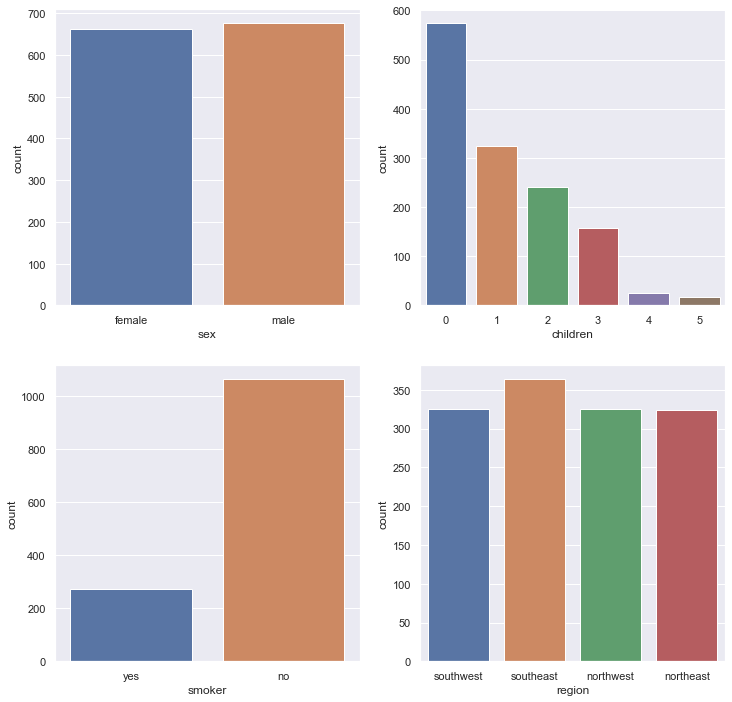

In [383]:
plt.figure(figsize= (12,12))
plt.subplot(2,2,1)
sns.countplot(x=df.sex)

plt.subplot(2,2,2)
sns.countplot(x=df.children)

plt.subplot(2,2,3)
sns.countplot(x=df.smoker)

plt.subplot(2,2,4)
sns.countplot(x=df.region)

plt.show()


From over all view, 
- Sex is distributed almost evenly,
- presence of no children/ less than 3 children is more compared to 3/4/5
- Smoker presene is less compared non-smokers
- Values are evenly spread across almost all regions


#### Analysis of  categorical column

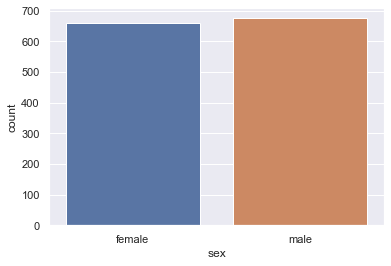

male      676
female    662
Name: sex, dtype: int64

Presence of male and female distribution looks very close similar, where male having slightly higher count then female
Based on the value counts, males are just 14 count above female distribution



In [384]:
sns.countplot(x=df.sex)
plt.show()
print(df.sex.value_counts())
print('''
Presence of male and female distribution looks very close similar, where male having slightly higher count then female
Based on the value counts, males are just 14 count above female distribution
''')

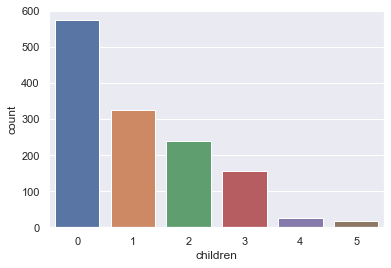

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

Presence of people having no children is higest compared to any other values.
Having 4/5 children is very less in distribution.



In [385]:
sns.countplot(x=df.children)
plt.show()
print(df.children.value_counts())
print('''
Presence of people having no children is higest compared to any other values.
Having 4/5 children is very less in distribution.
''')

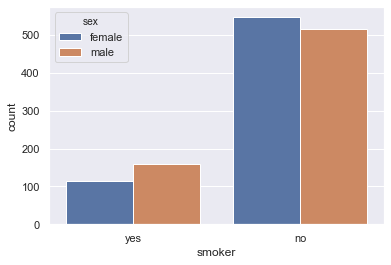

Presence of non-smoker are high in the distribution, male smokers are high compared to female
no     1064
yes     274
Name: smoker, dtype: int64


In [386]:
sns.countplot(x=df.smoker,hue=df.sex)
plt.show()
print("Presence of non-smoker are high in the distribution, male smokers are high compared to female")
print(df.smoker.value_counts())

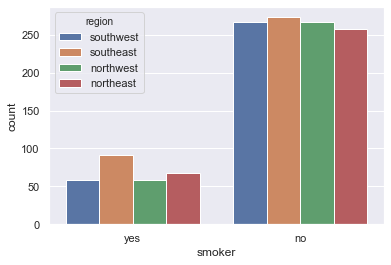

Smokers are distributed in all regions with southwest region having more somkers compared to others.
 Southwest is also leading the non smoker group as well with very light margin


In [387]:
sns.countplot(x=df.smoker,hue=df.region)
plt.show()
print('''Smokers are distributed in all regions with southwest region having more somkers compared to others.
 Southwest is also leading the non smoker group as well with very light margin''')

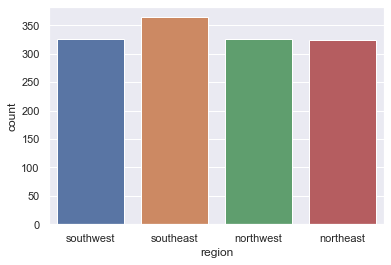

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

Southwest region has slightly more dominance in distribution compared to other regions.



In [388]:
sns.countplot(x=df.region)
plt.show()
print(df.region.value_counts())
print('''
Southwest region has slightly more dominance in distribution compared to other regions.
''')

### 3i. Pair plot that includes all the columns of the data frame

In [389]:
#pair plot ignores string values

# Deep copy
copydf=copy.deepcopy(df)
#covert categorical values to numerical before pair plot
copydf.loc[:,['sex', 'smoker', 'region']] = copydf.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 
plt.show()


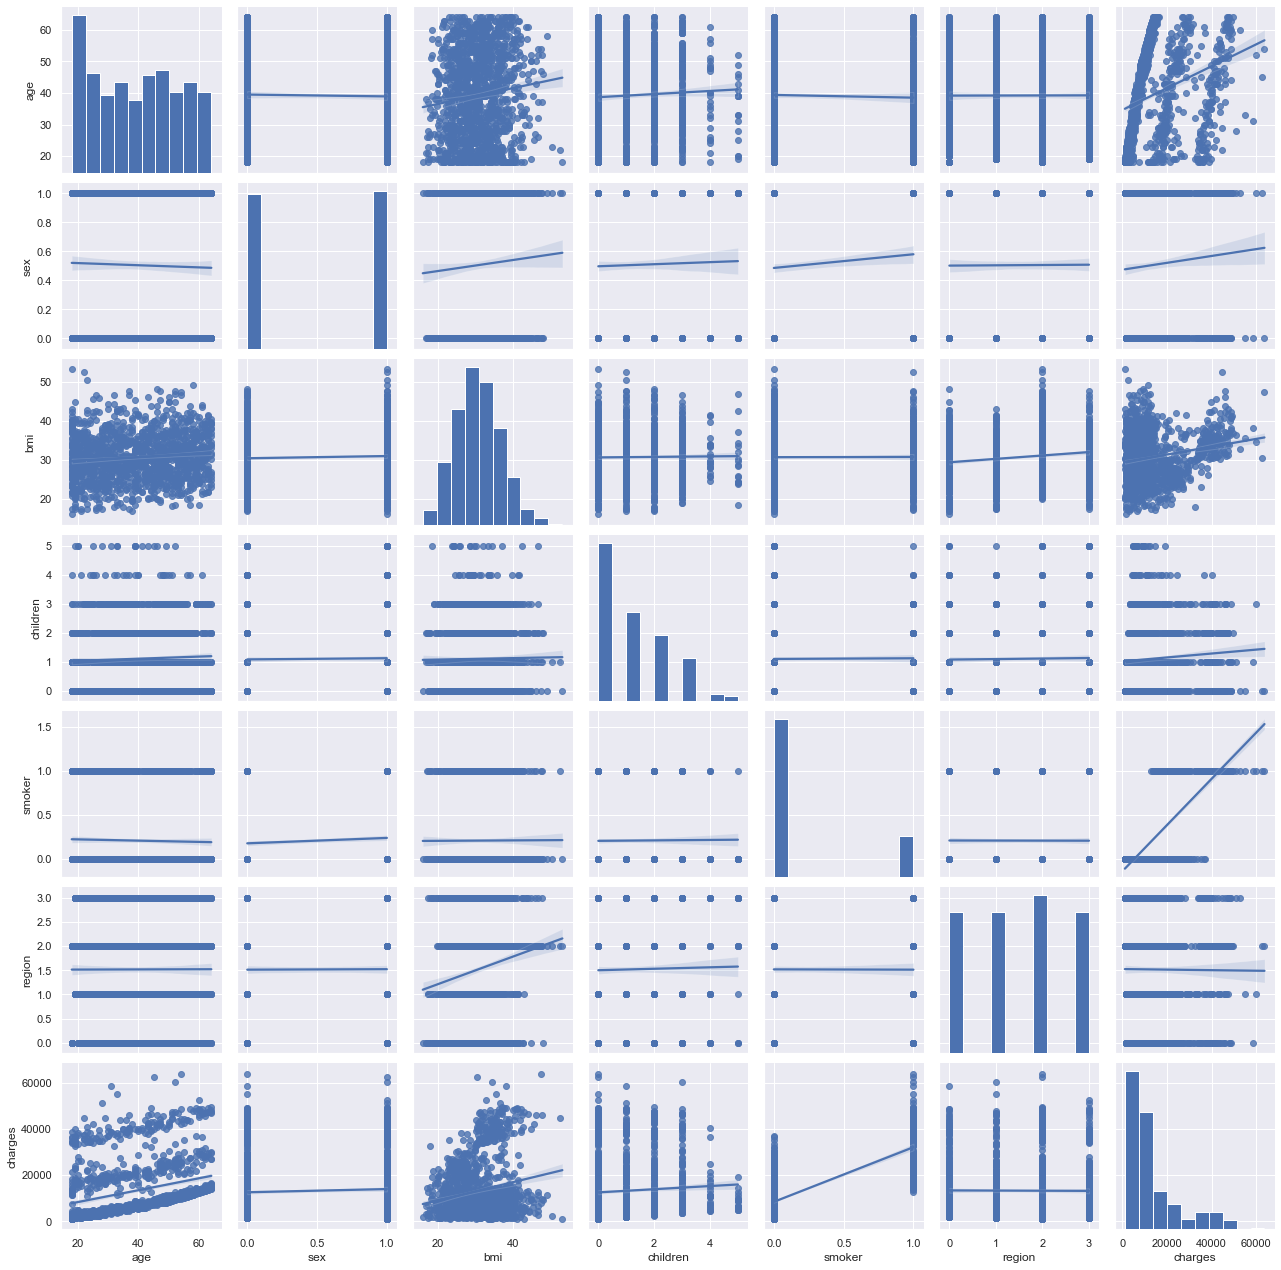

In [390]:
sns.pairplot(copydf, kind="reg")
plt.show()

In [391]:
print('''
Overview:
Pattern with age and charges: formation of groups based on charges across all age groups
increase with age shows correlation with charges
Pattern with smoker and charges: charges are higher for smokers, correlations seems high
''')


Overview:
Pattern with age and charges: formation of groups based on charges across all age groups
increase with age shows correlation with charges
Pattern with smoker and charges: charges are higher for smokers, correlations seems high



### Detailed analysis

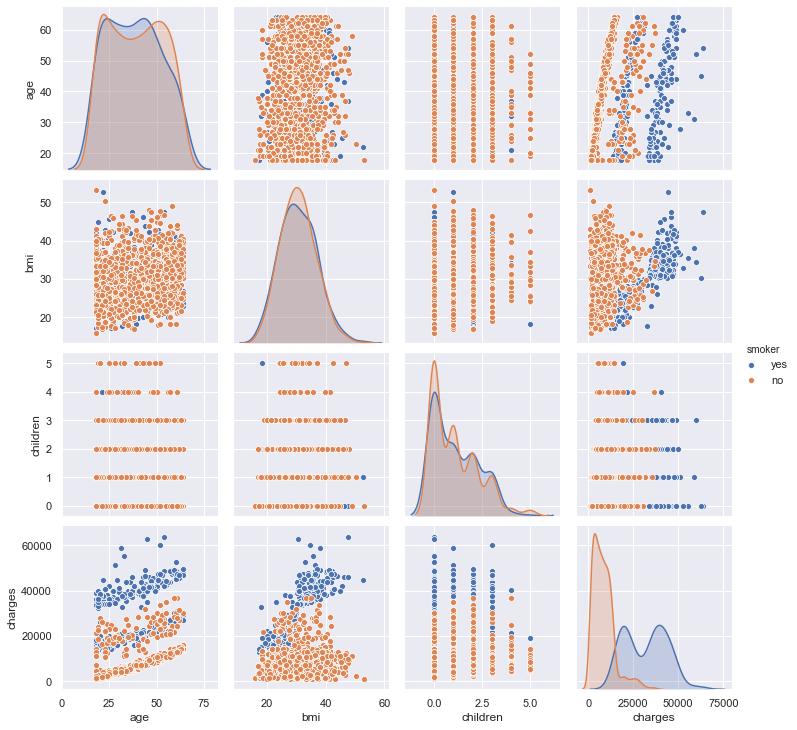


Non smokers presence is more in less than 10K charges and smokers has high presence in high chareges
Presence of smokers is less in people having 4/5 childrens
BMI peak at mean is slightly higher in non smoker compared to smokers



In [392]:
sns.pairplot(df,hue="smoker")
plt.show()
print('''
Non smokers presence is more in less than 10K charges and smokers has high presence in high chareges
Presence of smokers is less in people having 4/5 childrens
BMI peak at mean is slightly higher in non smoker compared to smokers
''')

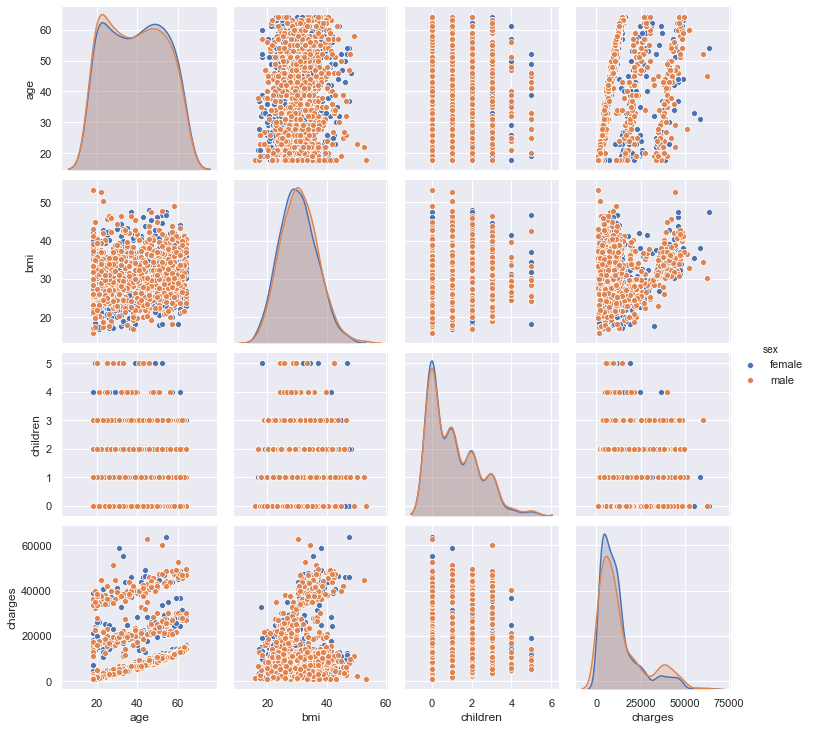


Male female distribution is similar in age,bmi,children and chareges.
Females are having slighlty higher presence in low charges (less than 25K) range compared to males.



In [393]:
sns.pairplot(df,hue="sex")
plt.show()
print('''
Male female distribution is similar in age,bmi,children and chareges.
Females are having slighlty higher presence in low charges (less than 25K) range compared to males.
''')

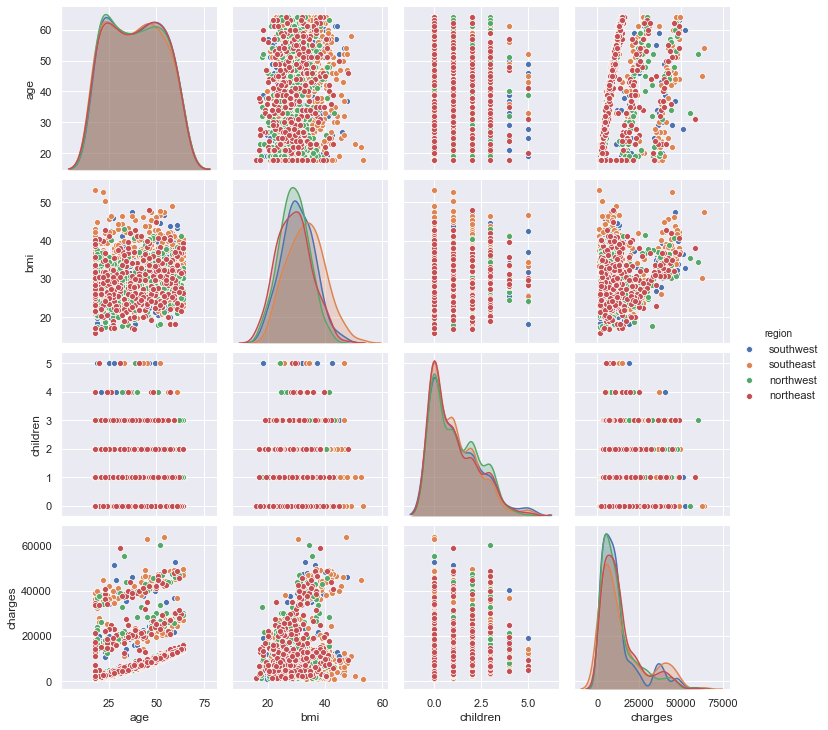


Northwest and southwest region presnce is more in less thank 25K charges range compared to other regions.
BMI peaks towards low BMI of northwest and southwest is higher compared to other regions, 
southeast is having lowest bmi peak of all and towards the high bmi region.



In [394]:
sns.pairplot(df,hue="region")
plt.show()
print('''
Northwest and southwest region presnce is more in less thank 25K charges range compared to other regions.
BMI peaks towards low BMI of northwest and southwest is higher compared to other regions, 
southeast is having lowest bmi peak of all and towards the high bmi region.
''')

In [395]:
#grid = sns.PairGrid(df)
#
#grid = grid.map_diag(plt.hist)
#grid = grid.map_upper(plt.scatter)
#grid = grid.map_lower(sns.kdeplot)

### 4a. Do charges of people who smoke differ significantly from the people who don't?

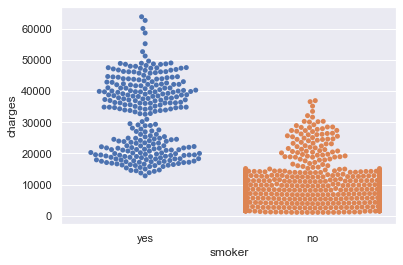

Charges seems higher for smokers in initial view.


In [396]:
sns.swarmplot(x=df.smoker,y=df.charges)
plt.show()
print("Charges seems higher for smokers in initial view.")

In [397]:
# H0 - Charges of people are similar for smoker and non smoker.
# HA - Charges of people who smoke differ significantly from the people.

In [398]:
smoker_charges = df[df['smoker'] == 'yes'].charges
smoker_charges

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

In [399]:
non_smoker_charges = df[df['smoker'] == 'no'].charges
non_smoker_charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [400]:
print("Smoker charges:",smoker_charges.mean(),"\nNon Smoker Charges:",non_smoker_charges.mean())
print("Smoker average charge seems higher")

Smoker charges: 32050.23183153285 
Non Smoker Charges: 8434.268297856199
Smoker average charge seems higher


In [401]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [402]:
# Ho = "Charges of people are similar for smoker and non-smoker"
# Ha = "Charges of peple are different for smoker and non-smoker"
# considering alpha of 0.05 , significance level of 5%

In [403]:
t_sm,p_value_sm=stats.ttest_ind(smoker_charges,non_smoker_charges)

In [404]:
if(p_value_sm<0.05):
    print('''p-Values is less than 5% significane level or 0.05,
        i.e. we reject the null hypothesis of charges being same for smoker and non-smoker.
        Ha = "Charges of people are different for smoker and non-smoker"
        \np-values: ''',p_value_sm,
        '''\nt-Stats:''',t_sm)
else:
    print('''p-Values is greater than 5% significane level or 0.05, i.e. we fail to reject the null hypothesis of charges being same for smoker and non-smoker.
        \np-values: ''',p_value_sm,
        '''\nt-Stats:''',t_sm)
    

p-Values is less than 5% significane level or 0.05,
        i.e. we reject the null hypothesis of charges being same for smoker and non-smoker.
        Ha = "Charges of people are different for smoker and non-smoker"
        
p-values:  8.271435842177219e-283 
t-Stats: 46.664921172723716


In [405]:
print('''Yes, charges of people who smoke differ significantly from the people who don't.
Statistically proven as p-value captured is significantly below 5% significance level.''')
print("Positive t stat show charges of smoker are higher then non-smoker.")

Yes, charges of people who smoke differ significantly from the people who don't.
Statistically proven as p-value captured is significantly below 5% significance level.
Positive t stat show charges of smoker are higher then non-smoker.


### 4b. Does bmi of males differ significantly from that of females?

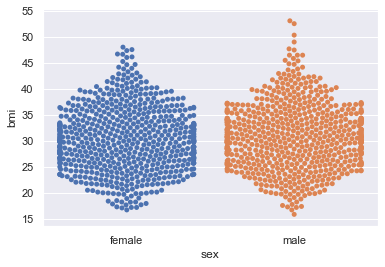

BMI distribution looks similar for both genders


In [406]:
sns.swarmplot(y=df.bmi,x=df.sex)
plt.show()
print("BMI distribution looks similar for both genders")

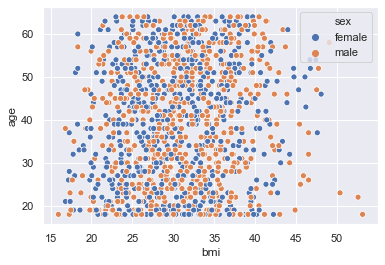

In [407]:
sns.scatterplot(x=df.bmi, y=df.age, hue=df.sex)

In [408]:
# Ho = "BMI is similar for males and females"
# Ha = "BMI is not similar for males and females"
# considering alpha of 0.05 , significance level of 5%

In [409]:
male_bmi=df[df['sex']=='male'].bmi
male_bmi.mean()

30.943128698224832

In [410]:
female_bmi=df[df['sex']=='female'].bmi
female_bmi.mean()

30.377749244713023

In [411]:
# mean BMI looks close enough for male and femal

In [412]:
t_bmi,p_value_bmi=stats.ttest_ind(female_bmi,male_bmi)
print(p_value_bmi)
print(t_bmi)

0.08997637178984932
-1.696752635752224


In [413]:
if(p_value_bmi<0.05):
    print('''p-Values is less than 5% significane level or 0.05, 
    i.e. we reject the null hypothesis of BMI is similar for males and females.
    Ha = "BMI is not similar for males and females"
    \np-values: ''',p_value_bmi,
    '''\nt-Stats:''',t_bmi)
else:
    print('''p-Values is greater than 5% significane level or 0.05, 
    \n i.e. we fail to reject the null hypothesis of BMI is similar for males and females.
    Ho = "BMI is similar for males and females"
    \np-values: ''',p_value_bmi,
    '''\nt-Stats:''',t_bmi)

p-Values is greater than 5% significane level or 0.05, 
    
 i.e. we fail to reject the null hypothesis of BMI is similar for males and females.
    Ho = "BMI is similar for males and females"
    
p-values:  0.08997637178984932 
t-Stats: -1.696752635752224


### 4.c Is the proportion of smokers significantly different in different genders?

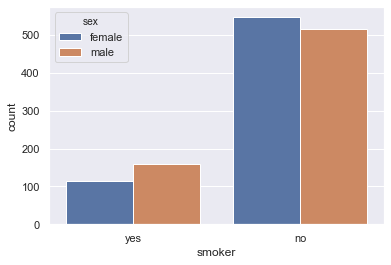

In [414]:
sns.countplot(x=df.smoker, hue=df.sex)

In [415]:
print("There is slight count difference between male and female smokers.")

There is slight count difference between male and female smokers.


In [416]:
#Chi-squared test for nominal (categorical) data

In [417]:
crosstab = pd.crosstab(df['sex'],df['smoker'])  # Contingency table of sex and smoker attributes

chi, p_value_sesm, dof, expected =  stats.chi2_contingency(crosstab)
print(p_value_sesm)

0.006548143503580696


In [418]:
#Ho = Proportion of smokers are similar in different genders
#Ha = Proportion of smokers significantly different in different genders
# considering alpha of 0.05 , significance level of 5%

In [419]:
if p_value_sesm < 0.05:  # Setting our significance level at 5%
    print("p-Values is less than 5% significane level or 0.05, Reject the null hypothesis")
    print("Ha = Proportion of smokers significantly different in different genders")
else:
    print("p-Values is greater than 5% significane level or 0.05, Failed to reject null hypothesis")
    print("Ho = Proportion of smokers are similar in different genders")

p-Values is less than 5% significane level or 0.05, Reject the null hypothesis
Ha = Proportion of smokers significantly different in different genders


### 4d. Is the distribution of bmi across women with no children, one child and two children, the same?

In [420]:
df_female = copy.deepcopy(df[df['sex'] == 'female'])
df_female

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692
...,...,...,...,...,...,...,...
1332,52,female,44.70,3,no,southwest,11411.68500
1334,18,female,31.92,0,no,northeast,2205.98080
1335,18,female,36.85,0,no,southeast,1629.83350
1336,21,female,25.80,0,no,southwest,2007.94500


In [421]:
print(df_female[df_female['children'] == 0]['bmi'].mean())
print(df_female[df_female['children'] == 1]['bmi'].mean())
print(df_female[df_female['children'] == 2]['bmi'].mean())

30.361522491349486
30.05265822784811
30.64978991596637


In [422]:
print("Mean BMI looks similar for all 3 ")

Mean BMI looks similar for all 3 


In [423]:
zero = df_female[df_female.children == 0]['bmi']
one = df_female[df_female.children == 1]['bmi']
two = df_female[df_female.children == 2]['bmi']

In [424]:
# Ho = distribution of bmi across women with no children, one child and two children, the same
# Ha = distribution of bmi across women with no children, one child and two children, not the same
# considering alpha of 0.05 , significance level of 5%

In [425]:

f_stat, p_value_fm = stats.f_oneway(zero,one,two)

if p_value_fm < 0.05:
    print("p-Values is less than 5% significane level or 0.05, Reject the null hypothesis.")
    print(p_value_fm)
    print("Ha = distribution of bmi across women with no children, one child and two children, is not same.")
else:
    print("p-Values is greater than 5% significane level or 0.05, Failed to reject null hypothesis.")
    print(p_value_fm)
    print("Ho = distribution of bmi across women with no children, one child and two children, is same.")

p-Values is greater than 5% significane level or 0.05, Failed to reject null hypothesis.
0.7158579926754841
Ho = distribution of bmi across women with no children, one child and two children, is same.
